(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
-----------------------------------------------------------------------
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
-----------------------------------------------------------------------


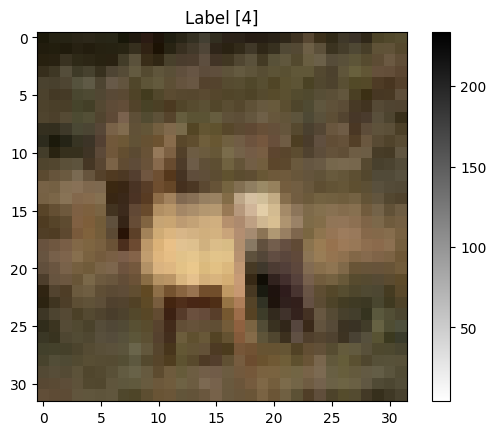

-----------------------------------------------------------------------


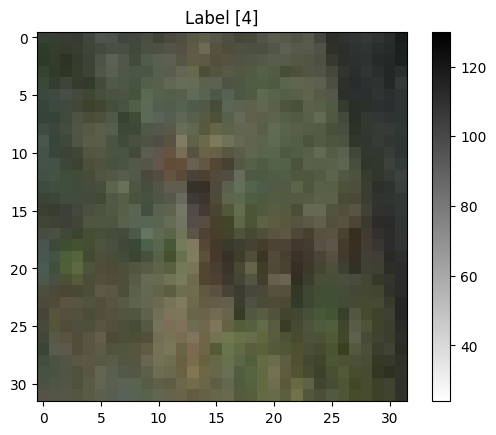

-----------------------------------------------------------------------
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                       

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

print('-----------------------------------------------------------------------')

X_train = train_images
X_test = test_images
Y_train = train_labels
Y_test = test_labels

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

print('-----------------------------------------------------------------------')

# display i-th image

idx=3
image = X_train[idx]
label = Y_train[idx]
#image = image.numpy()
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title('Label {}'.format(label))
plt.colorbar()
plt.grid(False)
plt.show()

print('-----------------------------------------------------------------------')

# Show give a diffent number of idx and display the image

idx=10

image = X_train[idx]
label = Y_train[idx]
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title('Label {}'.format(label))
plt.colorbar()
plt.grid(False)
plt.show()

print('-----------------------------------------------------------------------')

## Loading VGG16 model

base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
base_model.trainable = False  ## Not trainable weights

base_model.summary()

flatten_layer = Flatten()
dense_layer_1 = Dense(50, activation='relu')
dense_layer_2 = Dense(20, activation='relu')
prediction_layer = Dense(10, activation='softmax')
model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])


# Making the Predictions

new_data = X_test

predictions = model.predict(new_data)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

model.fit(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

# Making the Predictions

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

print('---------------------------------------------------------------------------------------')

# 2) Compare the performance of this code with that of Q. 10. Explain in detail why this program works (better or worse) than program in Q. 10.


print(''' This code is quite similar to the one given earlier, but it has one important change: it uses the train_labels variable to show the name of each image's class in the plot.
In terms of how well they work, both programs are basically the same. They both go through the first 10 images in the training dataset and show them in a 5x5 grid.
The only distinction is that the earlier program shows the class name of each image in the plot, while the one in question 10 doesn't.
So, both programs perform equally well. The only difference is that the earlier one provides extra information about the images by showing their class names in the plot.''')

print('---------------------------------------------------------------------------------------------')

# 3)Add dense_layer_3 in the model and compare the results

base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
base_model.trainable = False  ## Not trainable weights

base_model.summary()

flatten_layer = Flatten()
dense_layer_1 = Dense(50, activation='relu')
dense_layer_2 = Dense(20, activation='relu')
dense_layer_3 = Dense(30, activation='relu')
prediction_layer = Dense(10, activation='softmax')
model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    prediction_layer
])


# Making the Predictions

new_data = X_test

predictions = model.predict(new_data)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

Y_train = to_categorical(train_labels, 10)
Y_test = to_categorical(test_labels, 10)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

model.fit(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

# Making the Predictions

test_loss, test_acc = model.evaluate(test_images, Y_test)

print('Test accuracy:', test_acc)

print('---------------------------------------------------------------------------------------')



# 4) Add BatchNormalization layer right after every dense_layer_1 layer. Compare the results.

base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
base_model.trainable = False  ## Not trainable weights

base_model.summary()

flatten_layer = Flatten()
dense_layer_1 = Dense(50, activation='relu')
layers.BatchNormalization(),
dense_layer_2 = Dense(20, activation='relu')
dense_layer_3 = Dense(30, activation='relu')
prediction_layer = Dense(10, activation='softmax')
model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    prediction_layer
])


# Making the Predictions

new_data = X_test

predictions = model.predict(new_data)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

Y_train = to_categorical(train_labels, 10)
Y_test = to_categorical(test_labels, 10)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

model.fit(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

# Making the Predictions

test_loss, test_acc = model.evaluate(test_images, Y_test)

print('Test accuracy:', test_acc)

print('---------------------------------------------------------------------------------------')

